In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def day_to_str(x):
    m = str(x).split('.')[0]
    d = str(x).split('.')[1]
    if len(m)==1:
        m = '0' + m
    if len(d)==1:
        d = d +'0'
    return(m+'-'+d)

In [4]:
def player_char(RSB):
    temp1 = RSB.groupby(['batter_id','batter_name'])['height/weight','year_born','position','career','starting_salary'].apply(lambda x: x.mode())
    a = temp1['career'].map(lambda x : x.split('-') ).reset_index().drop(columns='level_2')
    a['e_school'] = np.nan
    a['m_school'] = np.nan
    a['h_school'] = np.nan
    a['col_school'] = np.nan
    a['team_lst'] = np.nan
    a['team1'] = np.nan
    a['team2'] = np.nan
    a['team3'] = np.nan
    a['team4'] = np.nan
    a['team5'] = np.nan

    
    b = a.values
    for lst in b:
        lst[7]=[]
        for i in lst[2]:
            if i[-1]=='초' or (len(i)>3 and i[2]=='초'):
                lst[3] = i
                #flst.remove(i)
            elif i[-1]=='중':
                lst[4] = i
                #flst.remove(i)
            elif i[-1]=='고'or i[-2:]=='고)':
                lst[5] = i
                #flst.remove(i)
            elif i!='현대' and (i[-1]=='대' or i[-2:]=='대)'):
                lst[6] = i
            else:
                lst[7].append(i)

    c = pd.DataFrame(b)
    d = c.values
    for i in d:
        for j in range(5):
            try:
                i[8+j] = i[7][j]
            except:
                0==0
    e = pd.DataFrame(d)

    e.columns = a.columns
    #print(e.shape, a.shape)
    f = e.drop(columns='career').drop(columns='team_lst')
    f['batter_id'] = f['batter_id'].map(lambda x : int(x))
    return(f)

In [5]:
def hw_split(x,i):
    try:
        np.isnan(x)
        return(x)
    except:
        return(int(x.split('/')[i].replace('cm','').replace('kg','')))
    
def position(x):
    try:
        posi = x.replace(')','').split('(')[0]
        tu = x.replace(')','').split('(')[1][:2]
        ta = x.replace(')','').split('(')[1][2:]
    except:
        posi = np.nan
        tu = np.nan
        ta = np.nan
    return(posi,tu,ta)

In [6]:
def tsplot(name,year,col):
    x = RSB_DbD[(RSB_DbD['ymd'].map(lambda x: x.year) == year) & ((RSB_DbD['batter_name']==name))]
    ts = pd.Series(x[col])
    ts.index = x['ymd']
    ts.plot()

In [7]:
path_dir = os.getcwd()+'/data'
fname =os.listdir(path_dir)
PSB = pd.read_csv('data/' + fname[0],na_values='-')
RSB = pd.read_csv('data/' + fname[1],na_values='-')
RSB_DbD =pd.read_csv('data/' + fname[2],na_values='-')
sub = pd.read_csv('data/' + fname[3],na_values='-')

In [8]:
player_char1 = RSB.groupby(['batter_id','batter_name'])['height/weight','year_born','position','starting_salary'].apply(lambda x: x.mode())
player_char1= player_char1.reset_index()
player_char2 = RSB[['batter_id','batter_name','year','team']].drop_duplicates(subset='batter_id',keep='last')
player_char3 = player_char(RSB)

In [9]:
df = player_char1.merge(player_char2,on=['batter_id','batter_name']).merge(player_char3, on = ['batter_id','batter_name'])
df['height'] = df['height/weight'].map(lambda x: hw_split(x,0))
df['weight'] = df['height/weight'].map(lambda x: hw_split(x,1))
df['posi'] = df['position'].map(lambda x: position(x)[0])
df['tu'] = df['position'].map(lambda x: position(x)[1])
df['ta'] = df['position'].map(lambda x: position(x)[2])
RSB_df = df.drop(columns='height/weight').drop(columns='position')
RSB_df['year_born'] = pd.to_datetime(RSB_df['year_born'].map(lambda x: x.replace('년 ','-').replace('월 ','-').replace('일','')))

In [10]:
RSB_DbD['ymd'] = RSB_DbD['year'].map(str) +'-' +RSB_DbD['date'].map(lambda x: day_to_str(x))
RSB_DbD['ymd'] = pd.to_datetime(RSB_DbD['ymd'])
RSB_DbD = RSB_DbD.drop(columns='date').drop(columns = 'year')

In [16]:
RSB_DbD.to_csv('Day_by_Day.csv', encoding = 'CP949',index=False)

In [12]:
RSB_DbD.head()

,batter_id,batter_name,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,ymd
0,0,가르시아,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018-03-24
1,0,가르시아,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018-03-25
2,0,가르시아,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018-03-27
3,0,가르시아,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018-03-28
4,0,가르시아,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018-03-29


In [ ]:
H +2*/AB

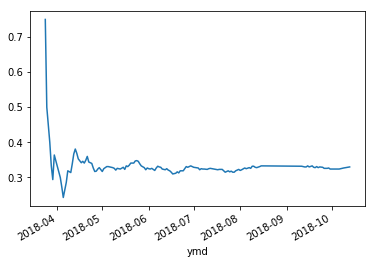

In [20]:
##선수별 시계열 그래프0
tsplot('러프',2018,'avg2')

In [16]:
## 선수별 개인정보
RSB_df.head()

,batter_id,batter_name,year_born,starting_salary,year,team,e_school,m_school,h_school,col_school,team1,team2,team3,team4,team5,height,weight,posi,tu,ta
0,0,가르시아,1985-04-12,NaN,2018,LG,NaN,NaN,NaN,쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,NaN,NaN,NaN,NaN,177.0,93.0,내야수,우투,우타
1,1,강경학,1992-08-11,10000만원,2018,한화,광주대성초,광주동성중,광주동성고,NaN,NaN,NaN,NaN,NaN,NaN,180.0,72.0,내야수,우투,좌타
2,2,강구성,1993-06-09,9000만원,2018,NC,관산초,부천중,야탑고,NaN,NC,상무,NaN,NaN,NaN,180.0,82.0,외야수,우투,좌타
3,3,강민국,1992-01-10,20000만원,2018,NC,송정동초,충장중,광주제일고,동국대,NC,상무,NaN,NaN,NaN,176.0,80.0,내야수,우투,우타
4,4,강민호,1985-08-18,9000만원,2018,삼성,제주신광초,포철중,포철공고,(국제디지털대),롯데,NaN,NaN,NaN,NaN,185.0,100.0,포수,우투,우타


In [16]:
## 일별 정보
RSB_DbD.head()

,batter_id,batter_name,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,ymd
0,0,가르시아,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018-03-24
1,0,가르시아,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018-03-25
2,0,가르시아,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018-03-27
3,0,가르시아,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018-03-28
4,0,가르시아,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018-03-29


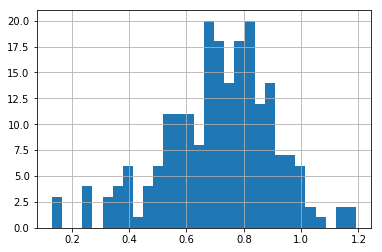

In [17]:
RSB[(RSB['year']==2018) & (RSB['OPS']!=0)]['OPS'].hist(bins = 30)

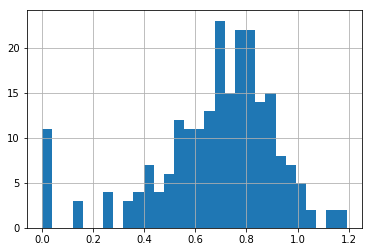

In [18]:
RSB[(RSB['year']==2018)]['OPS'].hist(bins = 30)

In [70]:
RSB[(RSB['year']==2018) & (RSB['OPS']!=0)]['G'].describe()

count    216.000000
mean      79.875000
std       46.322511
min        2.000000
25%       32.750000
50%       87.000000
75%      124.250000
max      144.000000
Name: G, dtype: float64

Object `pd.hist` not found.


In [47]:
RSB[RSB['batter_id']==1].to_csv('tmp.csv',encoding='CP949')

In [63]:
a = RSB[RSB['height/weight'].isna()]['batter_id'].unique()

array([138, 297,   6,   7,  10,  13,  14,  15,  17, 230, 122,  21,  25,
        26,  27, 121,  29,  32, 164,  47, 177,  49,  50,  78,  60,  61,
        80,  88,  92,  93,  94,  97,  98, 102, 106, 108, 110, 114, 118,
       125, 128, 129, 147, 150, 155, 156, 158, 159, 168, 170, 173, 181,
       185, 186, 189, 228, 191, 196, 197, 205, 206, 213, 214, 215, 218,
       222, 226, 237, 328, 240, 244, 246, 248, 253, 262, 267, 268, 272,
       280, 281, 285, 287, 289, 290, 296, 298, 299, 303, 304, 305, 306,
       320, 321, 322, 323, 330, 333, 336, 339, 340, 343])

In [72]:
b = sub['batter_id']